# Background - Classifying Fashion-MNIST

In this project we'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

First off, let's load the dataset through torchvision.

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

In [24]:
means = [0.5, 0.5, 0.5]
stdevs = [0.5, 0.5, 0.5]


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(means, stdevs)])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [104]:
training_size = len(trainloader)*64
test_size = len(testloader)*64

In [105]:
print('Number of training images: {}'.format(training_size))
print('Number of test images: {}'.format(test_size))

Number of training images: 60032
Number of test images: 10048


Here we can see one of the images.

In [89]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array(means)
        std = np.array(stdevs)
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

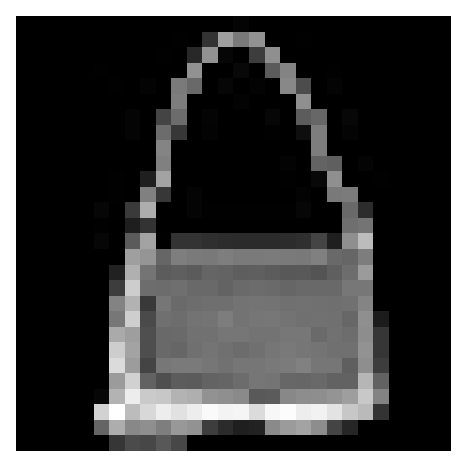

In [90]:
images, label = next(iter(trainloader))
imshow(images[0])



## Building the network

Here we define our network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. We'll make use of the ReLU activations for the layers and to return the logits from the forward pass. 

In [91]:
from collections import OrderedDict

# TODO: Define your network architecture here
input_size = 28 * 28
hidden_sizes = [256,128,64]
output_size = 10
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(in_features=input_size,out_features= hidden_sizes[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(in_features=hidden_sizes[0],out_features= hidden_sizes[1])),
    ('relu2', nn.ReLU()),   
    ('fc3', nn.Linear(in_features=hidden_sizes[1],out_features= hidden_sizes[2])),
    ('relu3', nn.ReLU()),   
    ('logits', nn.Linear(hidden_sizes[2], out_features=output_size))]))
model                                   

Sequential(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (logits): Linear(in_features=64, out_features=10, bias=True)
)

# Train the network

Now we can train our network. First we'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then we'll write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights



In [93]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [94]:
epochs = 50
print_every = 100
steps = 0


for e in range(epochs):
    running_loss =0
    for images, labels in iter(trainloader):
        
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0],input_size)
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0
        

Epoch: 1/50...  Loss: 0.9249
Epoch: 1/50...  Loss: 0.5664
Epoch: 1/50...  Loss: 0.5030
Epoch: 1/50...  Loss: 0.4943
Epoch: 1/50...  Loss: 0.4834
Epoch: 1/50...  Loss: 0.4599
Epoch: 1/50...  Loss: 0.4486
Epoch: 1/50...  Loss: 0.4244
Epoch: 1/50...  Loss: 0.4026
Epoch: 2/50...  Loss: 0.2388
Epoch: 2/50...  Loss: 0.3826
Epoch: 2/50...  Loss: 0.3901
Epoch: 2/50...  Loss: 0.3936
Epoch: 2/50...  Loss: 0.3894
Epoch: 2/50...  Loss: 0.3641
Epoch: 2/50...  Loss: 0.3716
Epoch: 2/50...  Loss: 0.3788
Epoch: 2/50...  Loss: 0.3553
Epoch: 3/50...  Loss: 0.0854
Epoch: 3/50...  Loss: 0.3408
Epoch: 3/50...  Loss: 0.3355
Epoch: 3/50...  Loss: 0.3283
Epoch: 3/50...  Loss: 0.3551
Epoch: 3/50...  Loss: 0.3441
Epoch: 3/50...  Loss: 0.3240
Epoch: 3/50...  Loss: 0.3534
Epoch: 3/50...  Loss: 0.3296
Epoch: 3/50...  Loss: 0.3361
Epoch: 4/50...  Loss: 0.2714
Epoch: 4/50...  Loss: 0.3125
Epoch: 4/50...  Loss: 0.3002
Epoch: 4/50...  Loss: 0.3114
Epoch: 4/50...  Loss: 0.3108
Epoch: 4/50...  Loss: 0.3168
Epoch: 4/50...

Epoch: 30/50...  Loss: 0.1101
Epoch: 30/50...  Loss: 0.1086
Epoch: 30/50...  Loss: 0.1021
Epoch: 30/50...  Loss: 0.1092
Epoch: 30/50...  Loss: 0.1095
Epoch: 31/50...  Loss: 0.0595
Epoch: 31/50...  Loss: 0.0892
Epoch: 31/50...  Loss: 0.1038
Epoch: 31/50...  Loss: 0.1008
Epoch: 31/50...  Loss: 0.1150
Epoch: 31/50...  Loss: 0.1060
Epoch: 31/50...  Loss: 0.1075
Epoch: 31/50...  Loss: 0.0927
Epoch: 31/50...  Loss: 0.1059
Epoch: 32/50...  Loss: 0.0175
Epoch: 32/50...  Loss: 0.0977
Epoch: 32/50...  Loss: 0.0965
Epoch: 32/50...  Loss: 0.0993
Epoch: 32/50...  Loss: 0.1045
Epoch: 32/50...  Loss: 0.0842
Epoch: 32/50...  Loss: 0.0997
Epoch: 32/50...  Loss: 0.1117
Epoch: 32/50...  Loss: 0.1065
Epoch: 32/50...  Loss: 0.1106
Epoch: 33/50...  Loss: 0.0701
Epoch: 33/50...  Loss: 0.0960
Epoch: 33/50...  Loss: 0.0836
Epoch: 33/50...  Loss: 0.0979
Epoch: 33/50...  Loss: 0.1025
Epoch: 33/50...  Loss: 0.0968
Epoch: 33/50...  Loss: 0.1146
Epoch: 33/50...  Loss: 0.0964
Epoch: 33/50...  Loss: 0.0981
Epoch: 34/

limit_output extension: Maximum message size of 10000 exceeded with 10026 characters

Next we'll test out our network on the test set

In [95]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


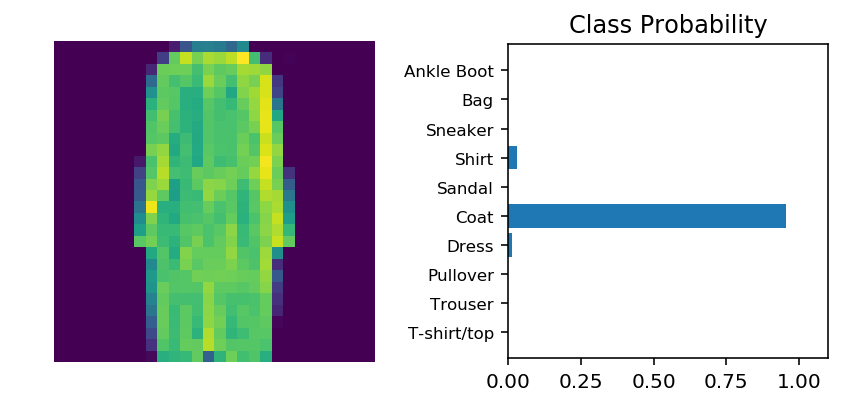

In [100]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)


with torch.no_grad():
    logits = model.forward(img)
    
# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps)

Now that your network is trained, we  want to save it to disk so we can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. The parameters for PyTorch networks are stored in a model's `state_dict`. We can see the state dict contains the weight and bias matrices for each of our layers.

In [106]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Sequential(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (logits): Linear(in_features=64, out_features=10, bias=True)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'logits.weight', 'logits.bias'])


In [107]:
torch.save(model.state_dict(), 'checkpoint.pth')